# Pruebas de procesamiento de frames. Extraccion de fuentes y background

In [1]:
import cv2
import astropy.io.fits as fits
import matplotlib.pyplot as plt
from astropy.visualization import astropy_mpl_style
plt.style.use(astropy_mpl_style)
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100

### Carga fichero de ejemplo

In [2]:
image_file="output/20201024013813_ZWO_ASI294MC_Pro.fit"
#image_file="output1/20201024011228_ZWO_ASI294MC_Pro.fit"

In [3]:
image_data = fits.getdata(image_file, ext=0)
image_data = image_data.byteswap().newbyteorder()
print(image_data.shape)

FileNotFoundError: [Errno 2] No such file or directory: 'output/20201024013813_ZWO_ASI294MC_Pro.fit'

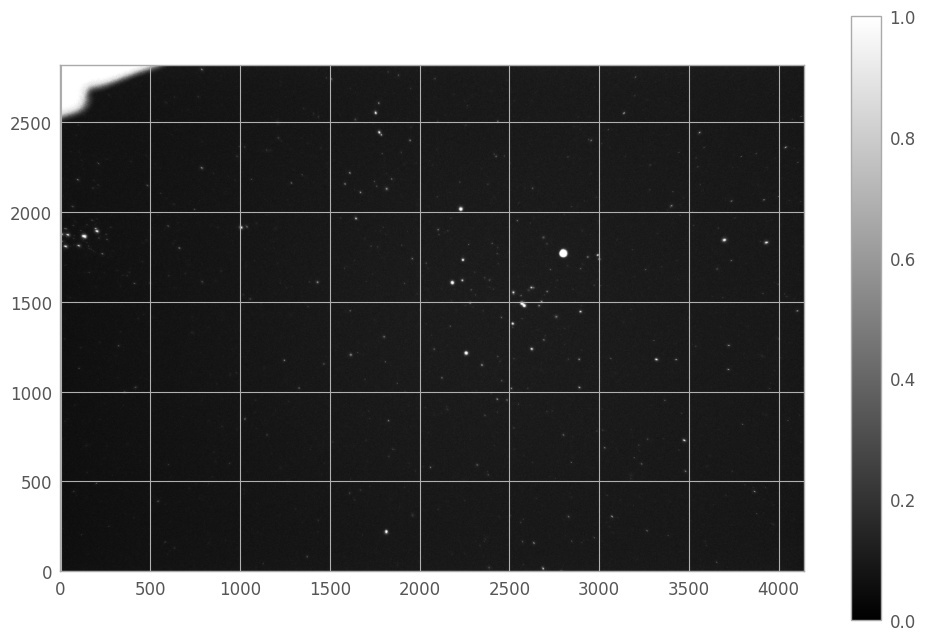

In [4]:
plt.figure()
plt.imshow(image_data, cmap='gray',origin='lower')
plt.colorbar()

In [8]:
image_data.dtype

dtype('<f8')

### Extraccion de fondo y fuentes con SEP

In [5]:
import sep

In [6]:
bkg = sep.Background(image_data)

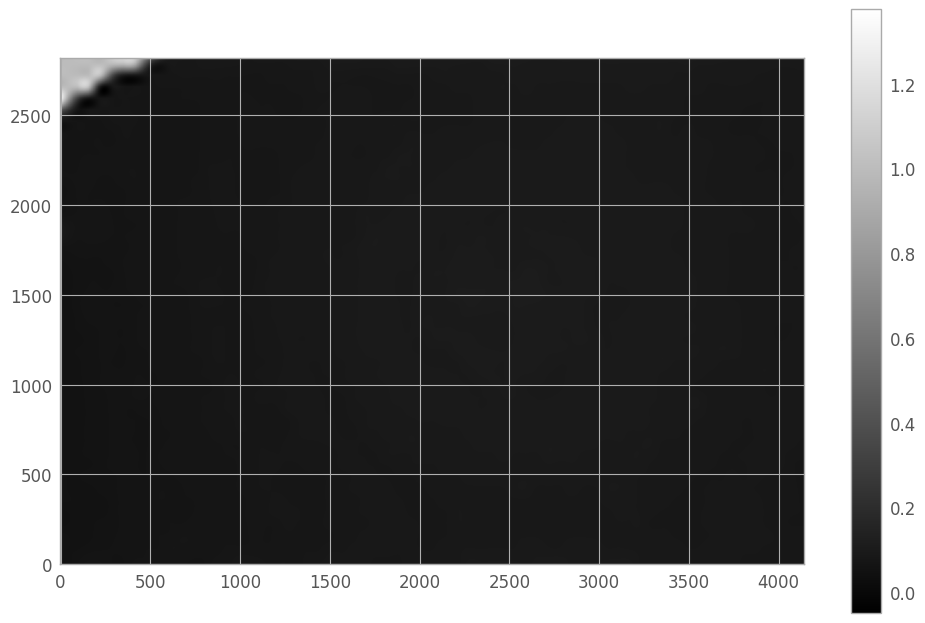

In [7]:
# show the background
plt.imshow(bkg, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar();

In [25]:
bkg.back().dtype

dtype('<f8')

In [8]:
thresh = 1.5 * bkg.globalrms
# subtract the background
data_sub = image_data - bkg
objects = sep.extract(data_sub, thresh)

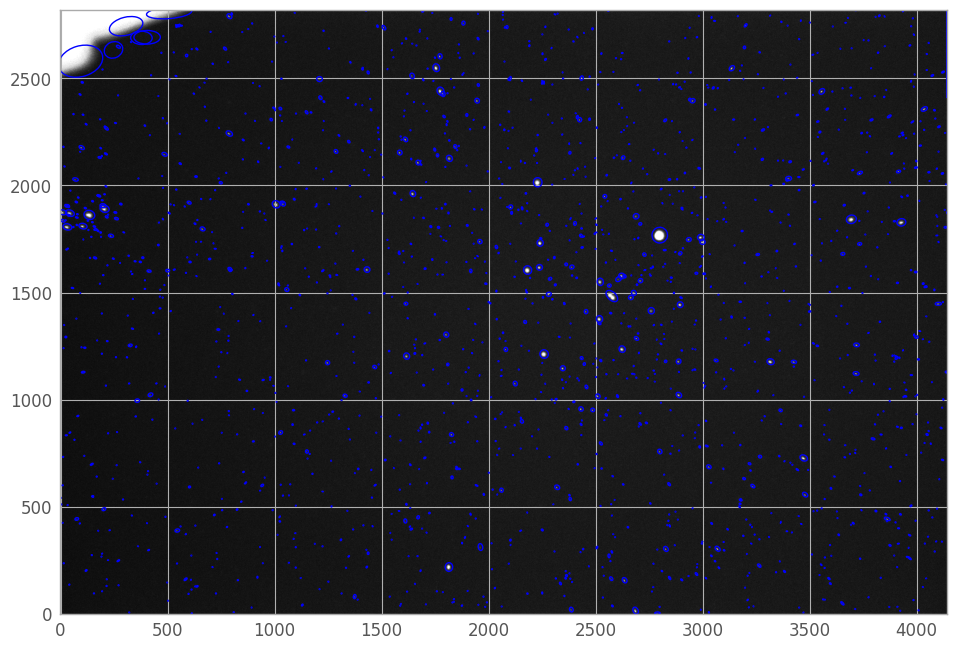

In [9]:
from matplotlib.patches import Ellipse
import numpy as np

# plot background-subtracted image
fig, ax = plt.subplots()
m, s = np.mean(data_sub), np.std(data_sub)
#im = ax.imshow(data, interpolation='nearest', cmap='gray',
#               vmin=m-s, vmax=m+s, origin='lower')
im = ax.imshow(image_data, cmap='gray', origin='lower')
# plot an ellipse for each object
for i in range(len(objects)):
    e = Ellipse(xy=(objects['x'][i], objects['y'][i]),
                width=6*objects['a'][i],
                height=6*objects['b'][i],
                angle=objects['theta'][i] * 180. / np.pi)
    e.set_facecolor('none')
    e.set_edgecolor('blue')
    ax.add_artist(e)

# FWHM para enfocar

In [10]:
def FWHM(objs):
    return 2 * np.sqrt(np.log(2)*(objs['x2'] + objs['y2']))

In [11]:
fwhm=FWHM(objects)

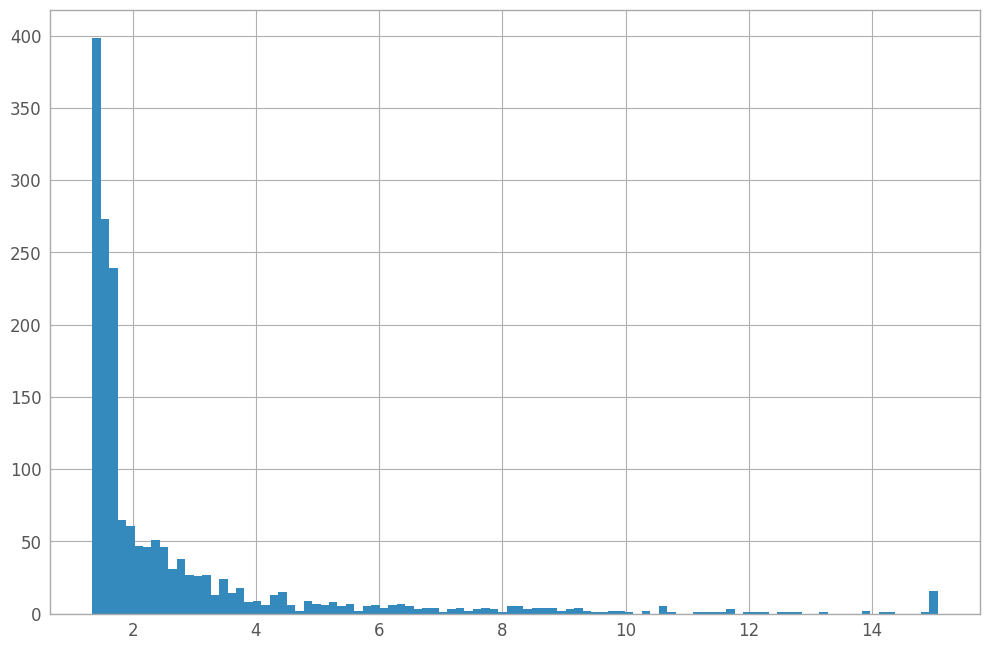

In [12]:
plt.hist(np.clip(fwhm,0,3*fwhm.std()),bins=100)
plt.show()

In [13]:
np.median(fwhm)

1.7087154182095443

In [14]:
np.mean(fwhm)

2.912834271626255